In [2]:
from Eof_functions import *



* Import Frames

In [4]:
path = 'C:\\Users\\ratynski\\Documents\\Python_Projects\\stratocu_waves-main\\DATA\\2022_09_06\\'
os.chdir(path)
files = glob.glob('*.png')

#for each image, create a frame_letter variable that will be used to store the imread image

frame_a = tools.imread(path + files[0])
frame_b = tools.imread(path + files[1])
frame_c = tools.imread(path + files[2])
frame_d = tools.imread(path + files[3])
frame_e = tools.imread(path + files[4])
frame_f = tools.imread(path + files[5])
frame_g = tools.imread(path + files[6])
frame_h = tools.imread(path + files[7])
frame_i = tools.imread(path + files[8])
frame_j = tools.imread(path + files[9])

frames = np.array([frame_a, frame_b, frame_c, frame_d, frame_e, frame_f, frame_g, frame_h, frame_i, frame_j])

There are multiple way to retrieve the fft (Unitless and with Units)

There two ways to retrieve kl (through an array or the circle method)

Units Method

In [ ]:
def distance_from_center_3d(shape):
    # Compute indices for each dimension
    z, i, j = np.indices(shape, sparse=True)
    center_z, center_i, center_j = shape[0] // 2, shape[1] // 2, shape[2] // 2
    # Calculate distance ignoring the first dimension (z)
    return np.sqrt((i - center_i)**2 + (j - center_j)**2)

data = frames

# Apply windowing to about 10% of the borders in each dimension
data_shape = data.shape
data_w = np.copy(data)
for dim in range(3):
    border_size = int(data_shape[dim] * 0.1)  # 30% of the dimension size
    if border_size < 1:
        border_size = 1  # Ensure at least one point gets the window applied
    
    full_window = np.hanning(2 * border_size)  # Full window for both sides

    # Create a window array full of ones
    window = np.ones(data_shape[dim])

    # Apply the Hanning window to the borders
    window[:border_size] = full_window[:border_size]
    window[-border_size:] = full_window[border_size:]

    # Reshape the window to match the data dimension
    if dim == 0:
        window = window[:, np.newaxis, np.newaxis]
    elif dim == 1:
        window = window[np.newaxis, :, np.newaxis]
    elif dim == 2:
        window = window[np.newaxis, np.newaxis, :]

    # Multiply the data with the window
    data_w *= window


# Perform 3D FFT
fft_data = np.fft.fftn(data_w)
fft_data = np.fft.fftshift(fft_data)

# Dimensions of the data
n_frames, n_rows, n_cols = data.shape

# Time interval between frames in seconds (30 minutes)
frame_interval = 1800  # 30 minutes = 1800 seconds
km_interval = 2*1000  # km per pixel, in meters

# Frequency and wavenumber components
# cycles per length of the data 
f = np.fft.fftfreq(n_frames, d=frame_interval)
k = np.fft.fftfreq(n_rows, d=km_interval)
l = np.fft.fftfreq(n_cols, d=km_interval)

f = np.fft.fftshift(f)
k = np.fft.fftshift(k)
l = np.fft.fftshift(l)

f, k, l = np.meshgrid(f, k, l, indexing='ij')





In [ ]:
# Total horizontal wavenumber and phase speed
kl = np.sqrt(k**2 + l**2)
kl[kl == 0] = np.inf  # Avoid division by zero
c = np.abs(np.pi*2*f) / kl 
kl[kl == np.inf] = 0

# Alternative method
kl_alt = distance_from_center_3d(fft_data.shape)
kl_alt[kl_alt == 0] = np.inf  # Avoid division by zero
c_alt = np.abs(np.pi*2*f) / kl_alt 
kl_alt[kl_alt == np.inf] = 0

# plot both method for the kl values for a single frame
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pcolormesh(kl[1,:,:], cmap= 'viridis')
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("k")
axs[0].set_ylabel("l")
axs[0].grid(True)
fig.colorbar(axs[0].pcolormesh(kl[1,:,:], cmap= 'viridis'), ax=axs[0])

axs[1].pcolormesh(kl_alt[0,:,:], cmap = 'viridis')
axs[1].set_title("Alternative method")
axs[1].set_xlabel("k")
axs[1].set_ylabel("l")
axs[1].grid(True)
fig.colorbar(axs[1].pcolormesh(kl_alt[0,:,:], cmap = 'viridis'), ax=axs[1])

plt.show()

# Flatten the arrays to make it easier to plot
kl=kl.flatten()
kl_alt = kl_alt.flatten()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl, bins=100, color='blue', alpha=0.7)
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("kl")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

axs[1].hist(kl_alt, bins=100, color='red', alpha=0.7)
axs[1].set_title("Alternative method")
axs[1].set_xlabel("kl")
axs[1].set_ylabel("Frequency")
axs[1].grid(True)

plt.show()


# Plotting the distribution of c values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(c.flatten(), bins=100, color='blue', alpha=0.7, log=True)
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("c (m/s)")
axs[0].set_ylabel("Frequency (Log Scale)")
axs[0].grid(True)

axs[1].hist(c_alt.flatten(), bins=100, color='red', alpha=0.7, log=True)
axs[1].set_title("Alternative method")
axs[1].set_xlabel("c (m/s)")
axs[1].set_ylabel("Frequency (Log Scale)")
axs[1].grid(True)

plt.show()


Unitless Method

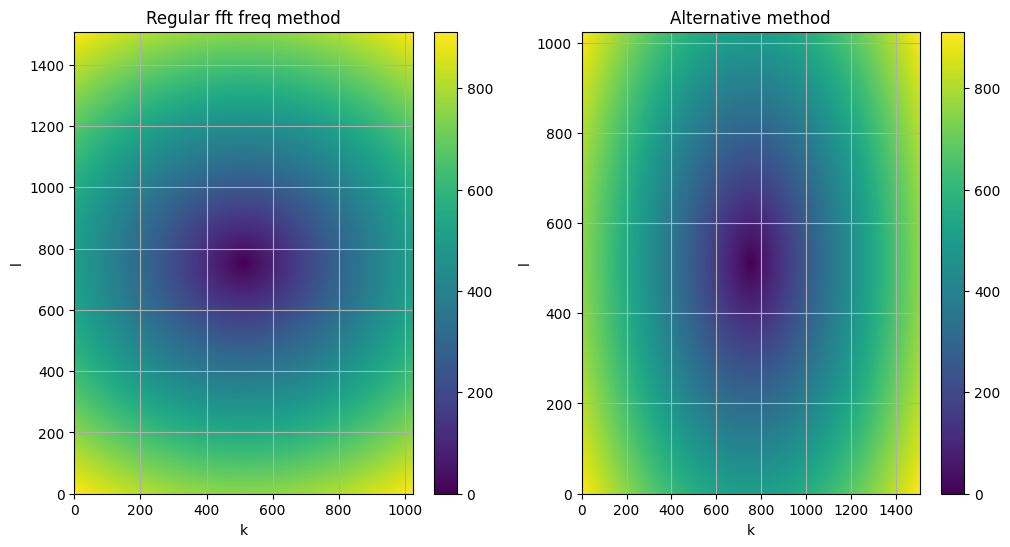

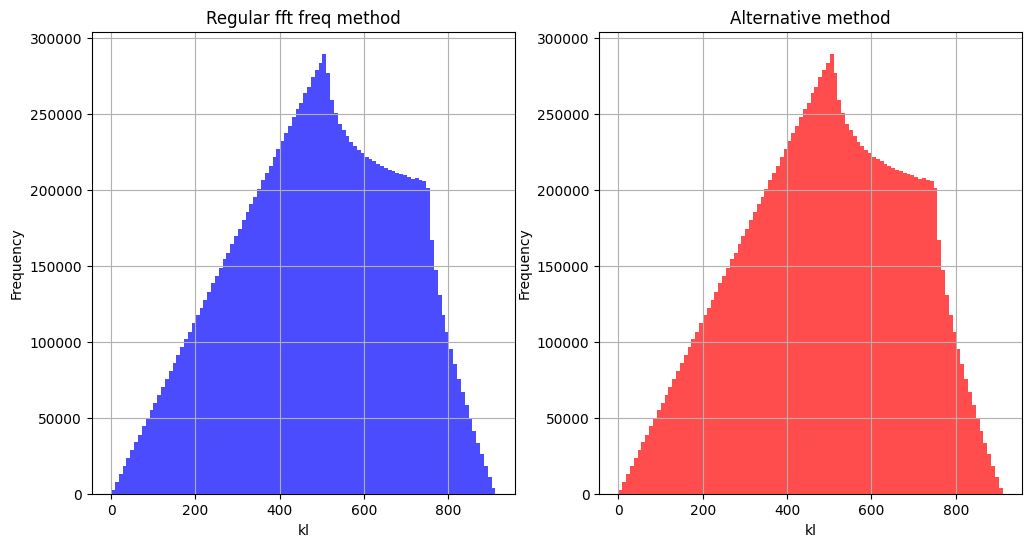

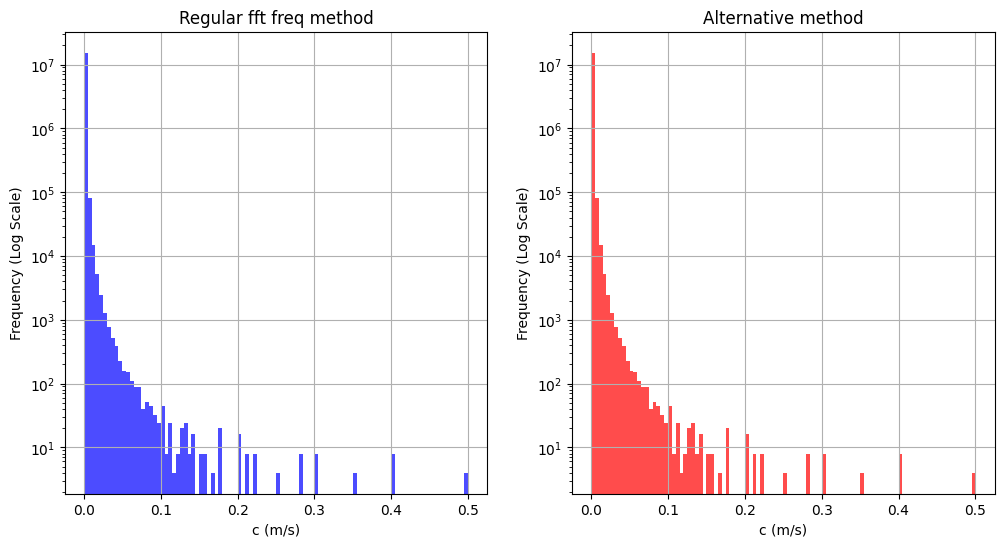

In [3]:
def distance_from_center_unitless(shape):
    # Compute indices for each dimension
    i, j = np.indices((shape[1], shape[2]), sparse=True)
    center_i, center_j = shape[1] // 2, shape[2] // 2
    # Calculate distance in pixel units
    return np.sqrt((i - center_i)**2 + (j - center_j)**2)

data= frames
data_shape = data.shape
data_w = np.copy(data)
for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
    border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
    if border_size < 1:
        border_size = 1  # Ensure at least one point gets the window applied
    
    full_window = np.hanning(2 * border_size)  # Full window for both sides
    window = np.ones(data_shape[dim])  # Create a window array full of ones
    window[:border_size] = full_window[:border_size]
    window[-border_size:] = full_window[border_size:]

    # Reshape the window to match the data dimension
    if dim == 1:
        window = window[np.newaxis, :, np.newaxis]
    elif dim == 2:
        window = window[np.newaxis, np.newaxis, :]

    # Multiply the data with the window
    data_w *= window


# Perform 3D FFT
fft_data = np.fft.fftn(data_w)
fft_data = np.fft.fftshift(fft_data)

# Calculate kl unitlessly for each pixel
k = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1])) 
l = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2]))
k, l = np.meshgrid(k, l)

# Calculate total wavenumber array
kl = np.sqrt(k**2 + l**2)

# Calculate kl unitlessly for each pixel
kl_alt = distance_from_center_unitless(fft_data.shape)
#kl_alt = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)

# Frequency components as unitless (normalized index positions)
f = np.fft.fftfreq(data_shape[0])
f = np.fft.fftshift(f)

# Replicate kl for each time frame
kl_rep = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)

# Calculate unitless phase speed
kl_rep[kl_rep == 0] = np.inf  # Avoid division by zero
c = np.abs(f[:, np.newaxis, np.newaxis]) / kl_rep  # c is unitless
kl_rep[kl_rep == np.inf] = 0
kl=kl_rep

kl_alt_rep = np.repeat(kl_alt[np.newaxis, :, :], data_shape[0], axis=0)
kl_alt_rep[kl_alt_rep == 0] = np.inf  # Avoid division by zero
c_alt = np.abs(f[:, np.newaxis, np.newaxis]) / kl_alt_rep  # c is unitless
kl_alt_rep[kl_alt_rep == np.inf] = 0
kl_alt=kl_alt_rep

# plot both method for the kl values for a single frame
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pcolormesh(kl[1,:,:], cmap= 'viridis')
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("k")
axs[0].set_ylabel("l")
axs[0].grid(True)
fig.colorbar(axs[0].pcolormesh(kl[1,:,:], cmap= 'viridis'), ax=axs[0])

axs[1].pcolormesh(kl_alt[0,:,:], cmap = 'viridis')
axs[1].set_title("Alternative method")
axs[1].set_xlabel("k")
axs[1].set_ylabel("l")
axs[1].grid(True)
fig.colorbar(axs[1].pcolormesh(kl_alt[0,:,:], cmap = 'viridis'), ax=axs[1])

plt.show()

# Flatten the arrays to make it easier to plot
kl=kl.flatten()
kl_alt = kl_alt.flatten()


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl, bins=100, color='blue', alpha=0.7)
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("kl")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)

axs[1].hist(kl_alt, bins=100, color='red', alpha=0.7)
axs[1].set_title("Alternative method")
axs[1].set_xlabel("kl")
axs[1].set_ylabel("Frequency")
axs[1].grid(True)

plt.show()


# Plotting the distribution of c values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(c.flatten(), bins=100, color='blue', alpha=0.7, log=True)
axs[0].set_title("Regular fft freq method")
axs[0].set_xlabel("c (m/s)")
axs[0].set_ylabel("Frequency (Log Scale)")
axs[0].grid(True)

axs[1].hist(c_alt.flatten(), bins=100, color='red', alpha=0.7, log=True)
axs[1].set_title("Alternative method")
axs[1].set_xlabel("c (m/s)")
axs[1].set_ylabel("Frequency (Log Scale)")
axs[1].grid(True)

plt.show()


Conversion from unitless to m/s

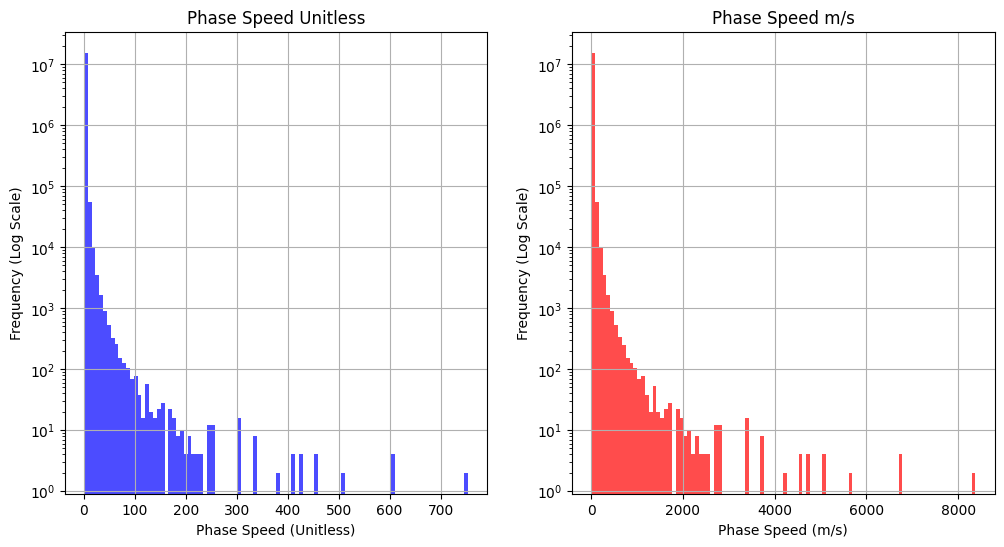

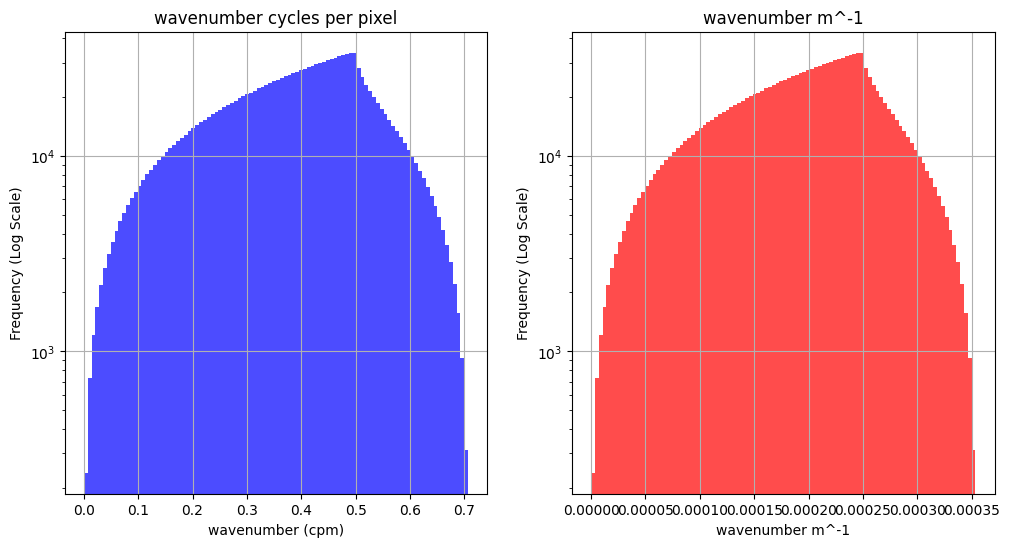

In [4]:

# Apply windowing to about 10% of the borders in each dimension
data_shape = data.shape
data_w = np.copy(data)
for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
    border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
    if border_size < 1:
        border_size = 1  # Ensure at least one point gets the window applied
    
    full_window = np.hanning(2 * border_size)  # Full window for both sides
    window = np.ones(data_shape[dim])  # Create a window array full of ones
    window[:border_size] = full_window[:border_size]
    window[-border_size:] = full_window[border_size:]

    # Reshape the window to match the data dimension
    if dim == 1:
        window = window[np.newaxis, :, np.newaxis]
    elif dim == 2:
        window = window[np.newaxis, np.newaxis, :]

    # Multiply the data with the window
    data_w *= window


# Perform 3D FFT
fft_data = np.fft.fftn(data_w)
fft_data = np.fft.fftshift(fft_data)

# Calculate kl unitlessly for each pixel
k = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1])) 
l = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2]))
k, l = np.meshgrid(k, l)

k = k/(data_shape[1])
l = l/(data_shape[2])

k_real = k/2000
l_real = l/2000
# Calculate total wavenumber array
kl_rep = np.sqrt(k**2 + l**2)

# kl = distance_from_center_unitless(fft_data.shape)
# # Replicate kl for each time frame
# kl_rep = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)

# Frequency components as unitless (normalized index positions)
f = np.fft.fftfreq(data_shape[0])
f = np.fft.fftshift(f)

mask = np.abs(f) > (1 / 24.0)
f *= mask

# Calculate unitless phase speed
kl_rep[kl_rep == 0] = np.inf  # Avoid division by zero
c = np.abs(f[:, np.newaxis, np.newaxis]) / kl_rep  # c is unitless
kl_rep[kl_rep == np.inf] = 0
kl = kl_rep

# Convert f to cycles per second (Hz) and kl to cycles per meter
f_real = f / 1800*frames.shape[0]
kl_real = np.sqrt(k_real**2 + l_real**2)

kl_real[kl_real == 0] = np.inf 
c_real = np.abs(f_real[:, np.newaxis, np.newaxis]) / kl_real
kl_real[kl_real == np.inf] = 0

# Plotting the distribution of c values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(c.flatten(), bins=100, color='blue', alpha=0.7, log=True)
axs[0].set_title("Phase Speed Unitless")
axs[0].set_xlabel("Phase Speed (Unitless)")
axs[0].set_ylabel("Frequency (Log Scale)")
axs[0].grid(True)

axs[1].hist(c_real.flatten(), bins=100, color='red', alpha=0.7, log=True)
axs[1].set_title("Phase Speed m/s")
axs[1].set_xlabel("Phase Speed (m/s)")
axs[1].set_ylabel("Frequency (Log Scale)")
axs[1].grid(True)

plt.show()


# Plotting the distribution of kl values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl.flatten(), bins=100, color='blue', alpha=0.7, log=True)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency (Log Scale)")
axs[0].grid(True)

axs[1].hist(kl_real.flatten(), bins=100, color='red', alpha=0.7, log=True)
axs[1].set_title("wavenumber m^-1")
axs[1].set_xlabel("wavenumber m^-1")
axs[1].set_ylabel("Frequency (Log Scale)")
axs[1].grid(True)

plt.show()

Calculation of the fft and applying filters 

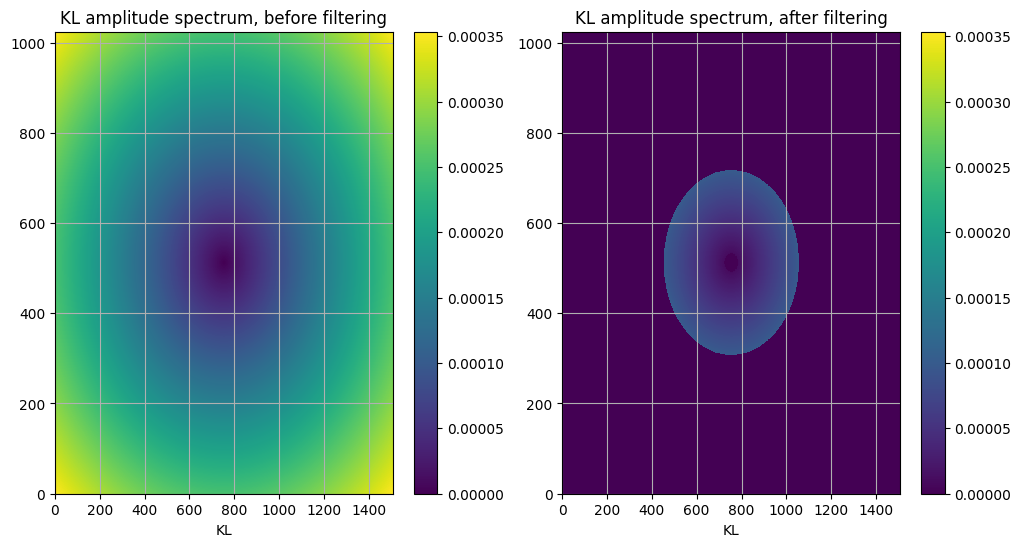

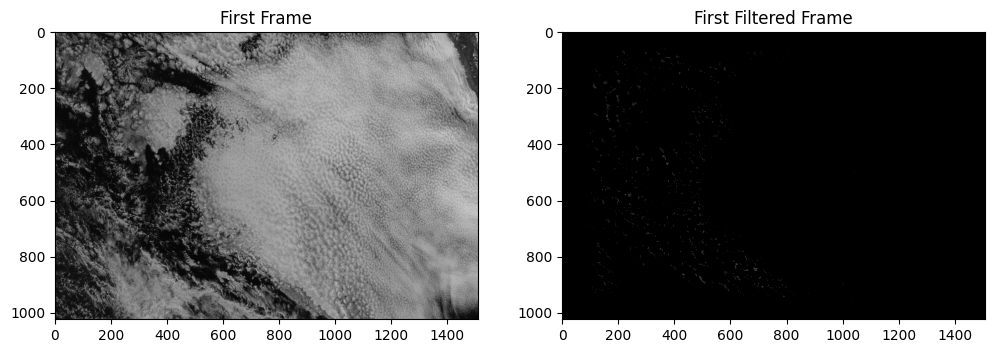

In [5]:
data_shape = data.shape
data_w = np.copy(data)
for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
    border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
    if border_size < 1:
        border_size = 1  # Ensure at least one point gets the window applied
    
    full_window = np.hanning(2 * border_size)  # Full window for both sides
    window = np.ones(data_shape[dim])  # Create a window array full of ones
    window[:border_size] = full_window[:border_size]
    window[-border_size:] = full_window[border_size:]

    # Reshape the window to match the data dimension
    if dim == 1:
        window = window[np.newaxis, :, np.newaxis]
    elif dim == 2:
        window = window[np.newaxis, np.newaxis, :]

    # Multiply the data with the window
    data_w *= window


# Perform 3D FFT
fft_data = np.fft.fftn(data_w)
fft_data = np.fft.fftshift(fft_data)

# Calculate kl unitlessly for each pixel
k = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2])) 
l = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1]))
k, l = np.meshgrid(k, l)

k = k/(data_shape[2])
l = l/(data_shape[1])

k_real = k/2000
l_real = l/2000
# Calculate total wavenumber array
kl = np.sqrt(k**2 + l**2)

# Frequency components as unitless (normalized index positions)
f = np.fft.fftfreq(data_shape[0])
f = np.fft.fftshift(f)

# Calculate unitless phase speed
kl[kl == 0] = np.inf  # Avoid division by zero
c = np.abs(f[:, np.newaxis, np.newaxis]) / kl  # c is unitless
kl[kl == np.inf] = 0


# Convert f to cycles per second (Hz) and kl to cycles per meter
f_real = f / 1800*frames.shape[0]
kl_real = np.sqrt(k_real**2 + l_real**2)

kl_real[kl_real == 0] = np.inf 
c_real = np.abs(f_real[:, np.newaxis, np.newaxis]) / kl_real
kl_real[kl_real == np.inf] = 0

kl = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)
kl_real = np.repeat(kl_real[np.newaxis, :, :], data_shape[0], axis=0)
f = np.repeat(f[:, np.newaxis], data_shape[1], axis=1)
f = np.repeat(f[:, :, np.newaxis], data_shape[2], axis=2)

f_real = np.repeat(f_real[:, np.newaxis], data_shape[1], axis=1)
f_real = np.repeat(f_real[:, :, np.newaxis], data_shape[2], axis=2)

# Define and apply a filter based on unitless criteria
# filter_mask = (kl_real < 1/10000) & (kl_real > 1/100000) & (np.abs(f) > (1 / 24.0)) & (c_real > 5) & (c_real < 50) 
# filter_mask =  (kl_real < 1/10000) & (kl_real > 1/100000)
filter_mask =  (kl_real < 1/10000) & (kl_real > 1/100000)

# Calculate the maximum value for consistent color scaling
vmax = np.max(kl_real[0, :, :])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the original data
pc0 = axs[0].pcolormesh(kl_real[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[0].set_title("KL amplitude spectrum, before filtering")
axs[0].set_xlabel("KL")
axs[0].grid(True)
fig.colorbar(pc0, ax=axs[0])  # Attach the colorbar to the first plot

# Apply filtering
kl_filter = kl_real.copy()
kl_filter[~filter_mask] = 0

# Plot for the filtered data
pc1 = axs[1].pcolormesh(kl_filter[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[1].set_title("KL amplitude spectrum, after filtering")
axs[1].set_xlabel("KL")
axs[1].grid(True)
fig.colorbar(pc1, ax=axs[1])  # Attach the colorbar to the second plot

plt.show()

fft_data[~filter_mask] = 0

# Inverse FFT and return
fft_data = np.fft.ifftshift(fft_data)
filtered_data = np.fft.ifftn(fft_data)
filtered_data = np.real(filtered_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(frames[0], cmap='gray', vmin=np.min(frames[0]), vmax=np.max(frames[0]))
axs[0].set_title("First Frame")
axs[1].imshow(filtered_data[0], cmap='gray', vmin=np.min(frames[0]), vmax=np.max(frames[0]))
axs[1].set_title("First Filtered Frame")
plt.show()


In [ ]:
# Plotting the distribution of kl values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl.flatten(), bins=500, color='blue', alpha=0.7)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency ")
axs[0].grid(True)

axs[1].hist(kl_real.flatten(), bins=500, color='red', alpha=0.7, range = (0, np.max(kl_real)))
axs[1].set_title("wavenumber m^-1")
axs[1].set_xlabel("wavenumber m^-1")
axs[1].set_ylabel("Frequency ")
axs[1].axvline(x=1/10000, color='black', linestyle='--')
axs[1].axvline(x=1/(100000), color='black', linestyle='--')
# overlay an histogram of the kl values with the filter mask applied
axs[1].hist(kl_real[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.max(kl_real)))
axs[1].grid(True)

plt.show()

In [ ]:
path = 'C:\\Users\\ratynski\\Documents\\Python_Projects\\stratocu_waves-main\\DATA\\2024_01_17\\'
os.chdir(path)
# Only keep files with the word "frame" in the name
files = [f for f in os.listdir() if 'frame' in f]

# save all the frames in a 3D array 
frames_video = np.array([tools.imread(f) for f in files])


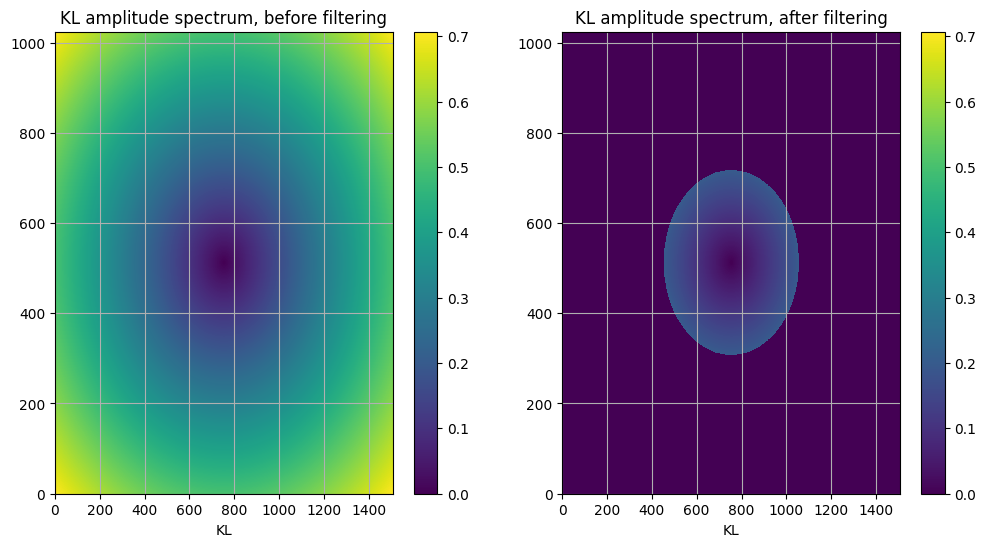

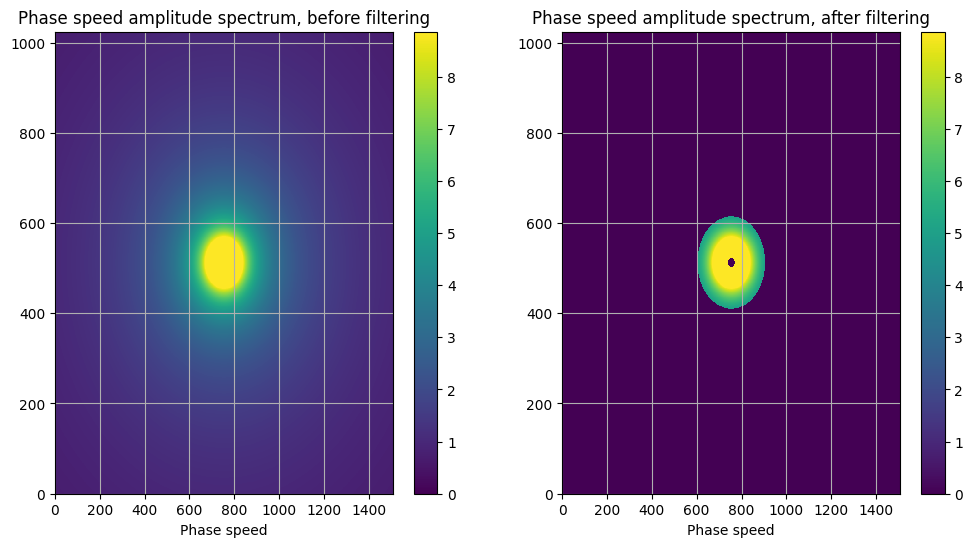

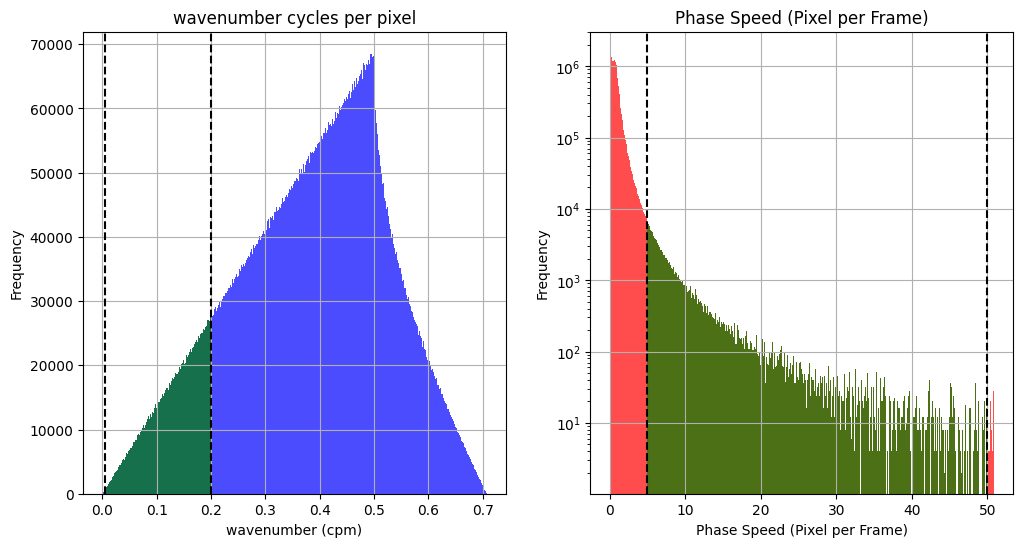

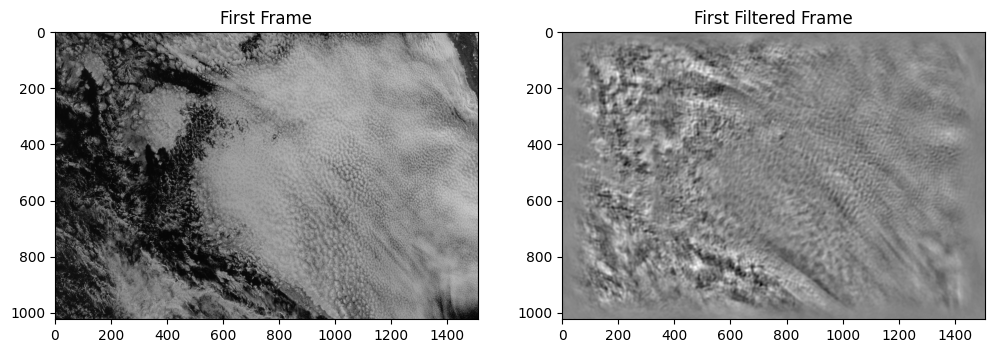

In [6]:
kl_cutoff = (1 / 5) * np.max(kl) 
kl_cutoff_inf, kl_cutoff_sup = 1/250, 1/5
c_cutoff_inf,c_cutoff_sup = 5,50 # pixels per frame


#data = frames_video[10:30]
data = frames
data_shape = data.shape
data_w = np.copy(data)
for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
    border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
    if border_size < 1:
        border_size = 1  # Ensure at least one point gets the window applied
    
    full_window = np.hanning(2 * border_size)  # Full window for both sides
    window = np.ones(data_shape[dim])  # Create a window array full of ones
    window[:border_size] = full_window[:border_size]
    window[-border_size:] = full_window[border_size:]

    # Reshape the window to match the data dimension
    if dim == 1:
        window = window[np.newaxis, :, np.newaxis]
    elif dim == 2:
        window = window[np.newaxis, np.newaxis, :]

    # Multiply the data with the window
    data_w *= window

# Perform 3D FFT
fft_data = np.fft.fftn(data_w)
fft_data = np.fft.fftshift(fft_data)

# Calculate kl unitlessly for each pixel
k = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2])) 
l = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1]))
k, l = np.meshgrid(k, l)

k = k/(data_shape[2])
l = l/(data_shape[1])

k_real = k/2000
l_real = l/2000
# Calculate total wavenumber array
kl = np.sqrt(k**2 + l**2)

# Frequency components as unitless (normalized index positions)
f = np.fft.fftfreq(data_shape[0])
f = np.fft.fftshift(f)

# Calculate unitless phase speed
kl[kl == 0] = np.inf  # Avoid division by zero
c = np.abs(f[:, np.newaxis, np.newaxis]) / kl  # c is unitless
kl[kl == np.inf] = 0


# Convert f to cycles per second (Hz) and kl to cycles per meter
#f_real = f / 1800*data.shape[0]
f_real = f / 1800
kl_real = np.sqrt(k_real**2 + l_real**2)

kl_real[kl_real == 0] = np.inf 
c_real = np.abs(f_real[:, np.newaxis, np.newaxis]) / kl_real
kl_real[kl_real == np.inf] = 0

kl = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)
kl_real = np.repeat(kl_real[np.newaxis, :, :], data_shape[0], axis=0)
f = np.repeat(f[:, np.newaxis], data_shape[1], axis=1)
f = np.repeat(f[:, :, np.newaxis], data_shape[2], axis=2)

f_real = np.repeat(f_real[:, np.newaxis], data_shape[1], axis=1)
f_real = np.repeat(f_real[:, :, np.newaxis], data_shape[2], axis=2)

# Calculate the maximum value for consistent color scaling
vmax = np.max(kl[0, :, :])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the original data
pc0 = axs[0].pcolormesh(kl[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[0].set_title("KL amplitude spectrum, before filtering")
axs[0].set_xlabel("KL")
axs[0].grid(True)
fig.colorbar(pc0, ax=axs[0])  # Attach the colorbar to the first plot

# Apply filtering
kl_disp= kl.copy()
#filter_mask = (kl <=  kl_cutoff ) 
filter_mask = (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )
kl_disp[~filter_mask] = 0

# Plot for the filtered data
pc1 = axs[1].pcolormesh(kl_disp[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[1].set_title("KL amplitude spectrum, after filtering")
axs[1].set_xlabel("KL")
axs[1].grid(True)
fig.colorbar(pc1, ax=axs[1])  # Attach the colorbar to the second plot

plt.show()

## Now the same for Phase Speed
# Calculate the maximum value for consistent color scaling
vmax = np.percentile(c[0, :, :],99)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the original data
pc0 = axs[0].pcolormesh(c[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[0].set_title("Phase speed amplitude spectrum, before filtering")
axs[0].set_xlabel("Phase speed")
axs[0].grid(True)
fig.colorbar(pc0, ax=axs[0])  # Attach the colorbar to the first plot

# Apply filtering
c_disp= c.copy()
filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup)
c_disp[~filter_mask] = 0

# Plot for the filtered data
pc1 = axs[1].pcolormesh(c_disp[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
axs[1].set_title("Phase speed amplitude spectrum, after filtering")
axs[1].set_xlabel("Phase speed")
axs[1].grid(True)
fig.colorbar(pc1, ax=axs[1])  # Attach the colorbar to the second plot

plt.show()

# Define and apply a filter based on unitless criteria
# filter_mask = (kl_real < 1/10000) & (kl_real > 1/100000) & (np.abs(f) > (1 / 24.0)) & (c_real > 5) & (c_real < 50) 
filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) & (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )

fft_data[~filter_mask] = 0

# Plotting the distribution of kl and c values 
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl.flatten(), bins=500, color='blue', alpha=0.7)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)
filter_mask = (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )
axs[0].axvline(x=kl_cutoff_inf, color='black', linestyle='--')
axs[0].axvline(x=kl_cutoff_sup, color='black', linestyle='--')
# overlay an histogram of the kl values with the filter mask applied
axs[0].hist(kl[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.max(kl)))
axs[0].grid(True)

axs[1].hist(c.flatten(), bins=500, color='red', alpha=0.7, range = (0, np.percentile(c,99.99)), log=True)
axs[1].set_title("Phase Speed (Pixel per Frame)")
axs[1].set_xlabel("Phase Speed (Pixel per Frame)")
axs[1].set_ylabel("Frequency")
axs[1].axvline(x=c_cutoff_inf, color='black', linestyle='--')
axs[1].axvline(x=c_cutoff_sup, color='black', linestyle='--')
filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) 
# overlay an histogram of the c values with the filter mask applied
axs[1].hist(c[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.percentile(c,99.99)), log=True)
axs[1].grid(True)


# Inverse FFT and return
fft_data = np.fft.ifftshift(fft_data)
filtered_data = np.fft.ifftn(fft_data)
filtered_data = np.real(filtered_data)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(data[0], cmap='gray')
axs[0].set_title("First Frame")
#fig.colorbar(axs[0].imshow(data[0], cmap='gray'), ax=axs[0])
axs[1].imshow(filtered_data[0], cmap='gray')
axs[1].set_title("First Filtered Frame")
#fig.colorbar(axs[1].imshow(filtered_data[0], cmap='gray'), ax=axs[1])
plt.show()


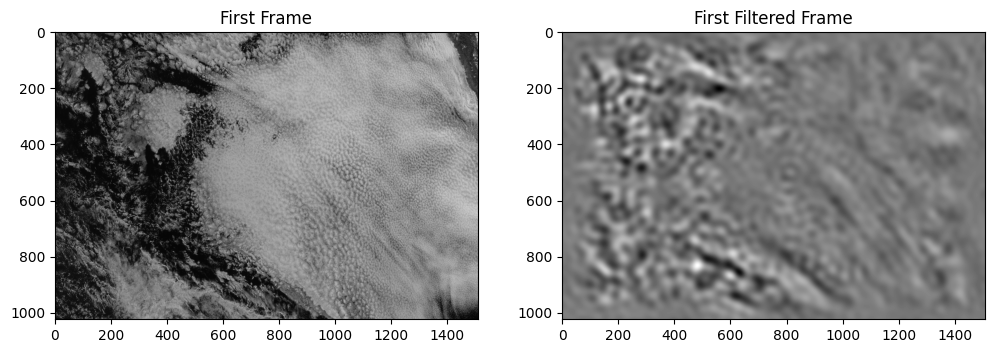

In [19]:
def FFT_Analysis(frames, plot_option='yes', plot_result ='yes', kl_cutoff_inf= 1/250, kl_cutoff_sup= 1/5 ,c_cutoff_inf= 5,c_cutoff_sup= 50 ):
    data = frames
    data_shape = data.shape
    data_w = np.copy(data)
    for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
        border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
        if border_size < 1:
            border_size = 1  # Ensure at least one point gets the window applied
        
        full_window = np.hanning(2 * border_size)  # Full window for both sides
        window = np.ones(data_shape[dim])  # Create a window array full of ones
        window[:border_size] = full_window[:border_size]
        window[-border_size:] = full_window[border_size:]

        # Reshape the window to match the data dimension
        if dim == 1:
            window = window[np.newaxis, :, np.newaxis]
        elif dim == 2:
            window = window[np.newaxis, np.newaxis, :]

        # Multiply the data with the window
        data_w *= window

    # Perform 3D FFT
    fft_data = np.fft.fftn(data_w)
    fft_data = np.fft.fftshift(fft_data)

    # Calculate kl unitlessly for each pixel
    k = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2])) 
    l = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1]))
    k, l = np.meshgrid(k, l)

    k = k/(data_shape[2])
    l = l/(data_shape[1])

    # Calculate total wavenumber array
    kl = np.sqrt(k**2 + l**2)

    # Frequency components as unitless (normalized index positions)
    f = np.fft.fftfreq(data_shape[0])
    f = np.fft.fftshift(f)

    # Calculate unitless phase speed
    kl[kl == 0] = np.inf  # Avoid division by zero
    c = np.abs(f[:, np.newaxis, np.newaxis]) / kl  # c is unitless
    kl[kl == np.inf] = 0


    kl = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)
    f = np.repeat(f[:, np.newaxis], data_shape[1], axis=1)
    f = np.repeat(f[:, :, np.newaxis], data_shape[2], axis=2)


    # Calculate the maximum value for consistent color scaling
    vmax = np.max(kl[0, :, :])

    if plot_option == 'yes':

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Plot for the original data
        pc0 = axs[0].pcolormesh(kl[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
        axs[0].set_title("KL amplitude spectrum, before filtering")
        axs[0].set_xlabel("KL")
        axs[0].grid(True)
        fig.colorbar(pc0, ax=axs[0])  # Attach the colorbar to the first plot

        # Apply filtering
        kl_disp= kl.copy()
        #filter_mask = (kl <=  kl_cutoff ) 
        filter_mask = (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )
        kl_disp[~filter_mask] = 0

        # Plot for the filtered data
        pc1 = axs[1].pcolormesh(kl_disp[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
        axs[1].set_title("KL amplitude spectrum, after filtering")
        axs[1].set_xlabel("KL")
        axs[1].grid(True)
        fig.colorbar(pc1, ax=axs[1])  # Attach the colorbar to the second plot

        plt.show()

        ## Now the same for Phase Speed
        # Calculate the maximum value for consistent color scaling
        vmax = np.percentile(c[0, :, :],99)

        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # Plot for the original data
        pc0 = axs[0].pcolormesh(c[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
        axs[0].set_title("Phase speed amplitude spectrum, before filtering")
        axs[0].set_xlabel("Phase speed")
        axs[0].grid(True)
        fig.colorbar(pc0, ax=axs[0])  # Attach the colorbar to the first plot

        # Apply filtering
        c_disp= c.copy()
        filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup)
        c_disp[~filter_mask] = 0

        # Plot for the filtered data
        pc1 = axs[1].pcolormesh(c_disp[0, :, :], cmap='viridis', vmin=0, vmax=vmax)
        axs[1].set_title("Phase speed amplitude spectrum, after filtering")
        axs[1].set_xlabel("Phase speed")
        axs[1].grid(True)
        fig.colorbar(pc1, ax=axs[1])  # Attach the colorbar to the second plot

        plt.show()

    # Define and apply a filter based on unitless criteria
    # filter_mask = (np.abs(f) > (1 / 24.0)) 
    filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) & (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )

    fft_data[~filter_mask] = 0

    if plot_option == 'yes':

        # Plotting the distribution of kl and c values 
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].hist(kl.flatten(), bins=500, color='blue', alpha=0.7)
        axs[0].set_title("wavenumber cycles per pixel")
        axs[0].set_xlabel("wavenumber (cpm)")
        axs[0].set_ylabel("Frequency")
        axs[0].grid(True)
        filter_mask = (kl >= kl_cutoff_inf) & (kl <= kl_cutoff_sup )
        axs[0].axvline(x=kl_cutoff_inf, color='black', linestyle='--')
        axs[0].axvline(x=kl_cutoff_sup, color='black', linestyle='--')
        # overlay an histogram of the kl values with the filter mask applied
        axs[0].hist(kl[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.max(kl)))
        axs[0].grid(True)

        axs[1].hist(c.flatten(), bins=500, color='red', alpha=0.7, range = (0, np.percentile(c,99.99)), log=True)
        axs[1].set_title("Phase Speed (Pixel per Frame)")
        axs[1].set_xlabel("Phase Speed (Pixel per Frame)")
        axs[1].set_ylabel("Frequency")
        axs[1].axvline(x=c_cutoff_inf, color='black', linestyle='--')
        axs[1].axvline(x=c_cutoff_sup, color='black', linestyle='--')
        filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) 
        # overlay an histogram of the c values with the filter mask applied
        axs[1].hist(c[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.percentile(c,99.99)), log=True)
        axs[1].grid(True)


    # Inverse FFT and return
    fft_data = np.fft.ifftshift(fft_data)
    filtered_data = np.fft.ifftn(fft_data)
    filtered_data = np.real(filtered_data)

    if plot_result == 'yes':
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].imshow(data[0], cmap='gray')
        axs[0].set_title("First Frame")
        #fig.colorbar(axs[0].imshow(data[0], cmap='gray'), ax=axs[0])
        axs[1].imshow(filtered_data[0], cmap='gray')
        axs[1].set_title("First Filtered Frame")
        #fig.colorbar(axs[1].imshow(filtered_data[0], cmap='gray'), ax=axs[1])
        plt.show()

    return filtered_data

filtered_frames=FFT_Analysis(frames, plot_option='no',kl_cutoff_sup=1/40)

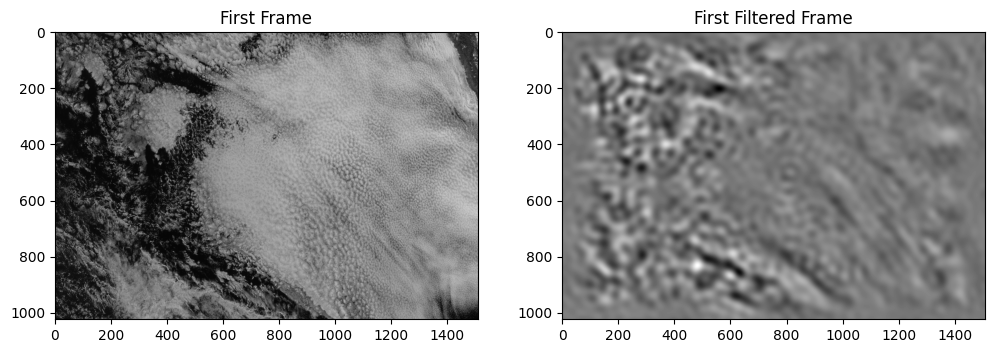

In [28]:
filtered_frames=FFT_Analysis(frames, plot_option='no',kl_cutoff_sup=1/40)

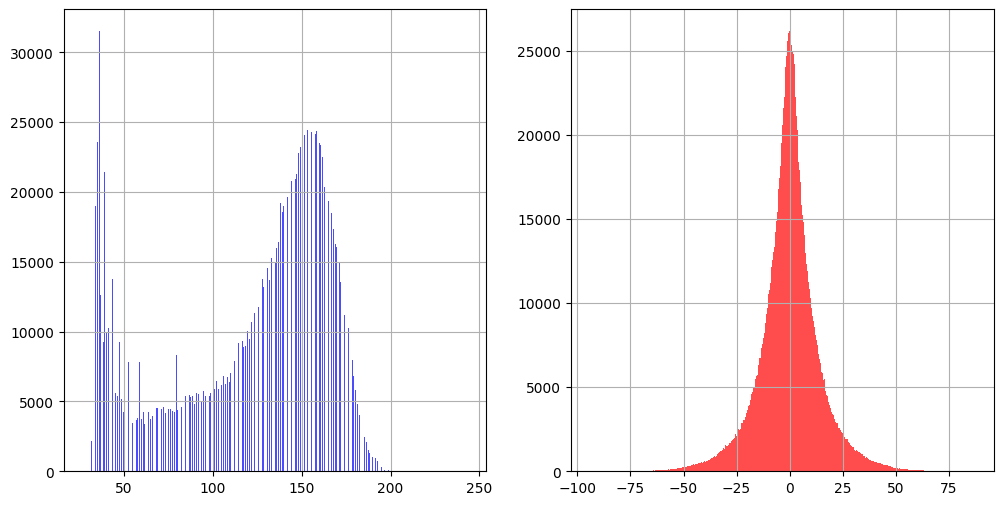

In [7]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(frames[0,:,:].flatten(), bins=500, color='blue', alpha=0.7)
axs[0].grid(True)


axs[1].hist(filtered_frames[0,:,:].flatten(), bins=500, color='red', alpha=0.7)
axs[1].grid(True)

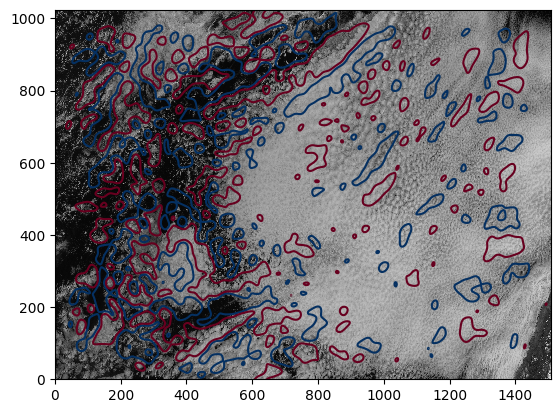

In [26]:
#plt.imshow(filtered_frames[0], cmap='RdBu_r')

plt.pcolormesh(frames[0], cmap='gray')

plt.contour(filtered_frames[0], levels=[-10,10],cmap='RdBu_r')

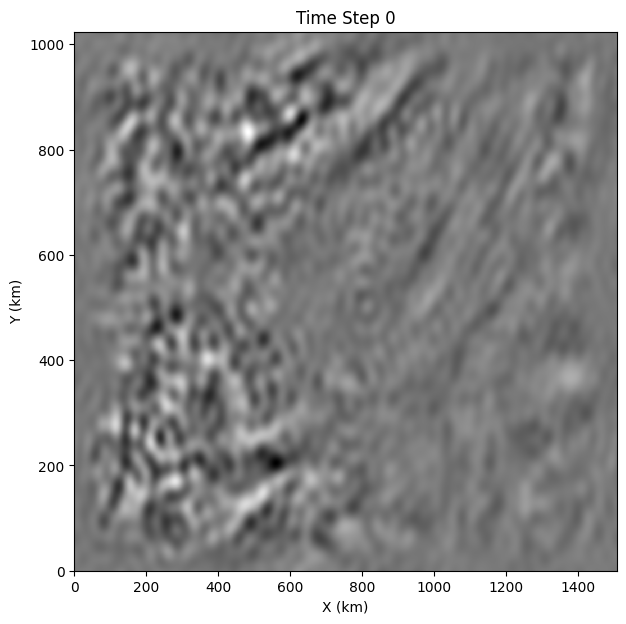

In [21]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

filtered_data=filtered_frames

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 7))  

def init():
    im = ax.pcolormesh(filtered_data[0, :, :],cmap='gray')
    ax.invert_yaxis() 
    plt.title(f'Time Step 0')
    plt.xlabel('X (km)')
    plt.ylabel('Y (km)')
    return [im]

# Function to animate the frames
def animate(t):
    im = ax.pcolormesh(filtered_data[t, :, :],vmin=np.min(filtered_data[0, :, :]),vmax=np.max(filtered_data[0, :, :]),cmap='gray')
    plt.title(f'Time Step {t}')
    return [im]

# Create an animation
ani = animation.FuncAnimation(fig, animate, init_func=init, frames=10, repeat=True)

# Display the animation in the Notebook
HTML(ani.to_jshtml())


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl_real.flatten(), bins=500, color='blue', alpha=0.7)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)
# overlay an histogram of the kl values with the filter mask applied
axs[0].grid(True)

axs[1].hist(c_real.flatten(), bins=500, color='red', alpha=0.7, range = (0, np.percentile(c_real,99.99)), log=True)
axs[1].set_title("Phase Speed (Pixel per Frame)")
axs[1].set_xlabel("Phase Speed (Pixel per Frame)")
axs[1].set_ylabel("Frequency")
# overlay an histogram of the c values with the filter mask applied
axs[1].grid(True)


In [ ]:
# Plotting the distribution of kl values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl.flatten(), bins=500, color='blue', alpha=0.7)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)
filter_mask = (kl <=  kl_cutoff ) 
axs[0].axvline(x=kl_cutoff, color='black', linestyle='--')
# overlay an histogram of the kl values with the filter mask applied
axs[0].hist(kl[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.max(kl)))
axs[0].grid(True)

axs[1].hist(c.flatten(), bins=500, color='red', alpha=0.7, range = (0, np.percentile(c,99)), log=True)
axs[1].set_title("Phase Speed (Pixel per Frame)")
axs[1].set_xlabel("Phase Speed (Pixel per Frame)")
axs[1].set_ylabel("Frequency")
axs[1].axvline(x=c_cutoff_inf, color='black', linestyle='--')
axs[1].axvline(x=c_cutoff_sup, color='black', linestyle='--')
filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) 
# overlay an histogram of the kl values with the filter mask applied
axs[1].hist(c[filter_mask].flatten(), bins=500, color='green', alpha=0.7, range = (0, np.percentile(c,99)), log=True)
axs[1].grid(True)

In [ ]:
# Plotting the distribution of kl values according to both methods
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].hist(kl.flatten(), bins=500, color='blue', alpha=0.7, log=True)
axs[0].set_title("wavenumber cycles per pixel")
axs[0].set_xlabel("wavenumber (cpm)")
axs[0].set_ylabel("Frequency")
axs[0].grid(True)
filter_mask = (kl <=  kl_cutoff ) 
axs[0].axvline(x=kl_cutoff, color='black', linestyle='--')
# overlay an histogram of the kl values with the filter mask applied
axs[0].hist(kl[filter_mask].flatten(), bins=500, color='green', alpha=0.7, log=True)
axs[0].grid(True)

axs[1].hist(c.flatten(), bins=500, color='red', alpha=0.7, log=True)
axs[1].set_title("Phase Speed (Pixel per Frame)")
axs[1].set_xlabel("Phase Speed (Pixel per Frame)")
axs[1].set_ylabel("Frequency")
axs[1].axvline(x=c_cutoff_inf, color='black', linestyle='--')
axs[1].axvline(x=c_cutoff_sup, color='black', linestyle='--')
filter_mask = (c > c_cutoff_inf) & (c < c_cutoff_sup) 
# overlay an histogram of the kl values with the filter mask applied
axs[1].hist(c[filter_mask].flatten(), bins=500, color='green', alpha=0.7, log=True)
axs[1].grid(True)

In [ ]:
def plot_distributions(data):
    # Apply windowing to about 10% of the borders in each dimension
    data_shape = data.shape
    data_w = np.copy(data)
    for dim in range(1, 3):  # This changes from range(3) to range(1, 3)
        border_size = int(data_shape[dim] * 0.1)  # 10% of the dimension size
        if border_size < 1:
            border_size = 1  # Ensure at least one point gets the window applied
        
        full_window = np.hanning(2 * border_size)  # Full window for both sides
        window = np.ones(data_shape[dim])  # Create a window array full of ones
        window[:border_size] = full_window[:border_size]
        window[-border_size:] = full_window[border_size:]

        # Reshape the window to match the data dimension
        if dim == 1:
            window = window[np.newaxis, :, np.newaxis]
        elif dim == 2:
            window = window[np.newaxis, np.newaxis, :]

        # Multiply the data with the window
        data_w *= window


    # Perform 3D FFT
    fft_data = np.fft.fftn(data_w)
    fft_data = np.fft.fftshift(fft_data)

    # Calculate kl unitlessly for each pixel
    k = np.fft.fftshift(np.fft.fftfreq(data_shape[1], d=1/data_shape[1])) 
    l = np.fft.fftshift(np.fft.fftfreq(data_shape[2], d=1/data_shape[2]))
    k, l = np.meshgrid(k, l)

    # Calculate total wavenumber array
    kl_rep = np.sqrt(k**2 + l**2)

    # kl = distance_from_center_unitless(fft_data.shape)
    # # Replicate kl for each time frame
    # kl_rep = np.repeat(kl[np.newaxis, :, :], data_shape[0], axis=0)

    # Frequency components as unitless (normalized index positions)
    f = np.fft.fftfreq(data_shape[0])
    f = np.fft.fftshift(f)

    mask = np.abs(f) > (1 / 24.0)
    f *= mask

    # only keep kl data between 0 and 20
    mask = (kl_rep>0) & (kl_rep<=(min(data_shape[1:3])/20))

    kl_rep *= mask

    # Calculate unitless phase speed
    kl_rep[kl_rep == 0] = np.inf  # Avoid division by zero
    c = np.abs(f[:, np.newaxis, np.newaxis]) / kl_rep  # c is unitless
    kl_rep[kl_rep == np.inf] = 0

    # Convert f to cycles per second (Hz) and kl to cycles per meter
    f_real = f / 1800
    kl_real = kl_rep / 2000
    kl_real[kl_real == 0] = np.inf 
    c_real = np.abs(2*np.pi*f_real[:, np.newaxis, np.newaxis]) / kl_real

    c_real_values = c_real.flatten()
    # Plotting the distribution of c values
    plt.figure(figsize=(10, 6))
    plt.hist(c_real_values, bins=100, color='blue', alpha=0.7, range=(0, np.max(c_real_values)))
    plt.yscale('log')  # Use logarithmic scale if the data spans several orders of magnitude
    plt.title('Distribution of Phase Speeds')
    plt.xlabel('Phase Speed m/s ')
    plt.ylabel('Frequency (Log Scale)')
    plt.grid(True)
    plt.show()


    # Flatten the array of c values to make it easier to plot
    c_values = c.flatten()

    # Plotting the distribution of c values
    plt.figure(figsize=(10, 6))
    plt.hist(c_values, bins=100, color='blue', alpha=0.7, range=(0, 0.1))
    plt.yscale('log')  # Use logarithmic scale if the data spans several orders of magnitude
    plt.title('Distribution of Phase Speeds')
    plt.xlabel('Phase Speed (unitless)')
    plt.ylabel('Frequency (Log Scale)')
    plt.grid(True)
    plt.show()

    # Flatten the array of kl values to make it easier to plot
    kl_values = kl_rep.flatten()

    # Plotting the distribution of kl values
    plt.figure(figsize=(10, 6))
    plt.hist(kl_values, bins=1000, color='blue', alpha=0.7)
    plt.yscale('log')  # Use logarithmic scale if the data spans several orders of magnitude
    plt.title('Distribution of Wavenumbers')
    plt.xlabel('Wavenumber (unitless)')
    plt.ylabel('Frequency (Log Scale)')
    plt.grid(True)
    plt.show()

    # flatten the array of f values to make it easier to plot
    f_values = f.flatten()

    # Plotting the distribution of f values
    plt.figure(figsize=(10, 6))
    plt.hist(f_values, bins=100, color='blue', alpha=0.7)
    plt.yscale('log')  # Use logarithmic scale if the data spans several orders of magnitude
    plt.title('Distribution of Frequencies')
    plt.xlabel('Frequency (unitless)')
    plt.ylabel('Frequency (Log Scale)')
    plt.grid(True)
    plt.show()


# Example usage
plot_distributions(frames)